<a href="https://colab.research.google.com/github/Rymendelous/projetadd/blob/main/projetadd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive') #pour accéder au drive

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path='/content/drive/MyDrive/projetadd/data/raw/covid.csv'
data_path_agemedian='/content/drive/MyDrive/projetadd/data/raw/agemedian.csv'
data_path_pop='/content/drive/MyDrive/projetadd/data/raw/densitepopulation/pop2022.csv'
data_path_education='/content/drive/MyDrive/projetadd/data/raw/education/education.csv'
data_path_revenu='/content/drive/MyDrive/projetadd/data/raw/revenumedian/revmedian.csv'
data = pd.read_csv(data_path, sep=";", nrows=50)


In [23]:
#ON NETTOIE LE DATASET DE DENSITÉ DE POPULATION ET ON VISUALISE LA POPULATION PAR DÉPARTEMENTS AVEC DES HISTOGRAMMES
#pop = JEU DE DONNÉES DE DENSITÉ
data_dep = pd.read_csv(data_path_pop, sep=";", dtype={'GEO': str}, low_memory=False)

# on garde que les départements de la métropoles, on enlève ceux d'outre mer et de corse
# 01 à 95 uniquement
metropole = [str(i).zfill(2) for i in range(1, 96)] #str(i).zfill(2)  transforme les numéros de dép à 1 chiffre en numéro à deux chiffre par exemple pour l'ain 01 au lieu de 1
pop = data_dep[data_dep['GEO'].isin(metropole)]
pop = pop[pop['TIME_PERIOD'] == 2022]
pop = pop[pop['SEX'] == '_T']
pop = pop.reset_index(drop=True)



In [24]:
pop['AGE'].unique()

array(['Y15T24', 'Y20T64', 'Y25T39', 'Y40T54', 'Y_GE80', 'Y55T64',
       'Y_GE65', '_T', 'Y65T79', 'Y_LT20', 'Y_LT15'], dtype=object)

In [25]:
age_rename = {
    'Y_LT15': '<15',
    'Y_LT20': '<20',
    'Y15T24': '15-24',
    'Y20T64': '20-64',
    'Y25T39': '25-39',
    'Y40T54': '40-54',
    'Y55T64': '55-64',
    'Y65T79': '65-79',
    'Y_GE65': '65+',
    'Y_GE80': '80+',
    '_T': 'Total'
}

pop['AGE'] = pop['AGE'].map(age_rename) #on renomme les valeurs de la variables AGE car c'était pas clair les Y.. machin
pop.head(30)

,AGE,GEO,GEO_OBJECT,RP_MEASURE,SEX,TIME_PERIOD,OBS_VALUE
0,15-24,93,DEP,POP,_T,2022,225145.217999
1,20-64,42,DEP,POP,_T,2022,408691.081674
2,25-39,45,DEP,POP,_T,2022,119253.561146
3,20-64,07,DEP,POP,_T,2022,175359.148527
4,20-64,37,DEP,POP,_T,2022,335190.569080
5,20-64,46,DEP,POP,_T,2022,88981.646406
6,40-54,82,DEP,POP,_T,2022,53252.100040
7,25-39,81,DEP,POP,_T,2022,58420.441490
8,40-54,95,DEP,POP,_T,2022,251935.510441
9,15-24,02,DEP,POP,_T,2022,58684.585426


Text(0.5, 1.0, "Répartition de la population par tranche d'âge en France(2022)")

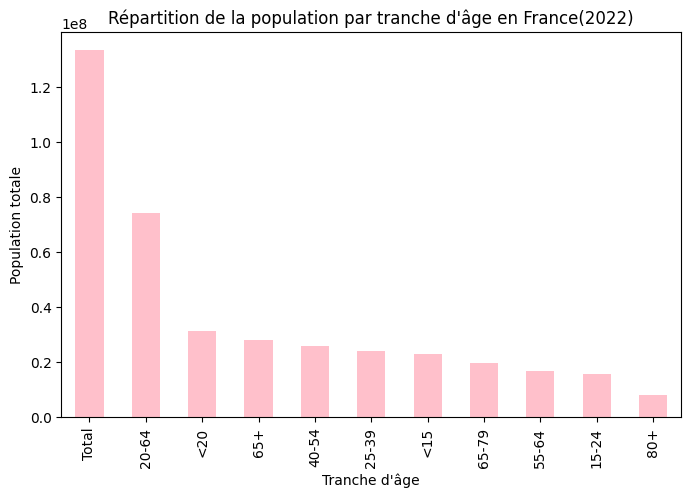

In [29]:
pop_age_total = pop.groupby('AGE')['OBS_VALUE'].sum().sort_values(ascending=False)
pop_age_total.plot(kind='bar', figsize=(8,5), color='pink')
plt.ylabel("Population totale")
plt.xlabel("Tranche d'âge")
plt.title("Répartition de la population par tranche d'âge en France(2022)")


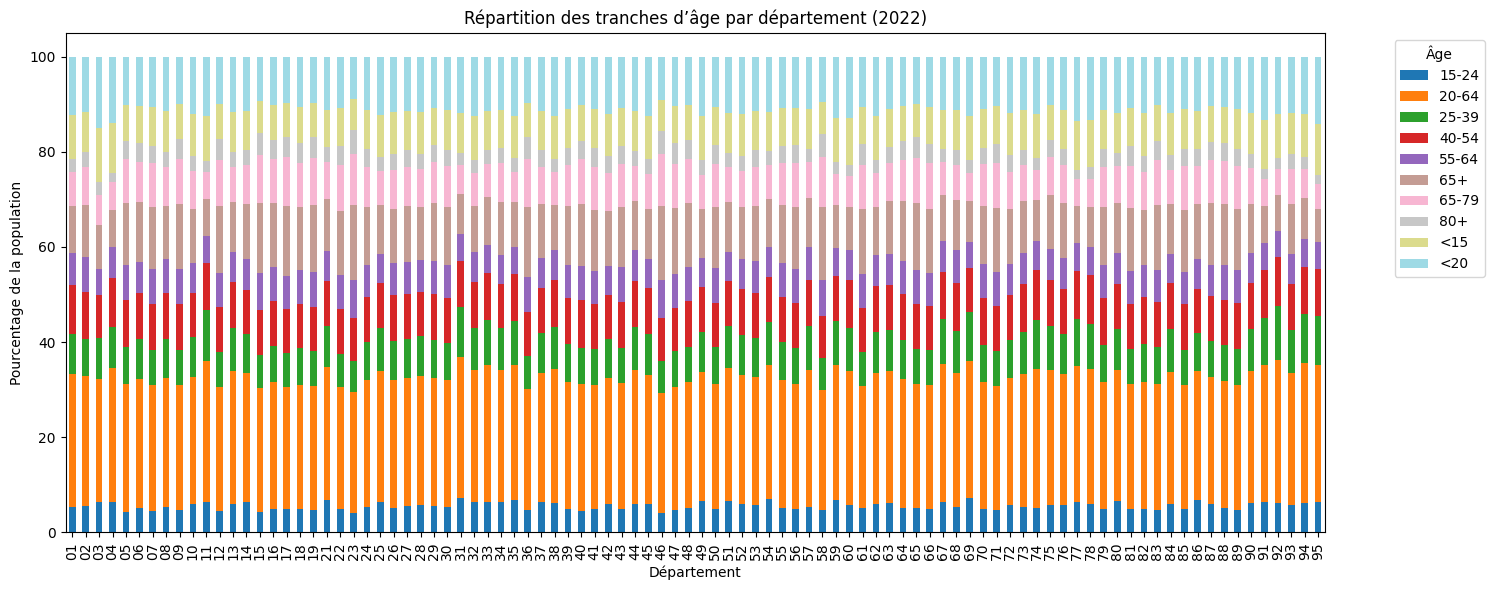

,GEO,AGE,OBS_VALUE,POP_TOT,POURCENTAGE
0,01,15-24,114431.132239,2.109716e+06,5.424006
1,01,20-64,587293.854589,2.109716e+06,27.837579
2,01,25-39,177961.951238,2.109716e+06,8.435351
3,01,40-54,216652.117650,2.109716e+06,10.269255
4,01,55-64,144304.296828,2.109716e+06,6.839987


In [39]:
pop_sans_total = pop[pop['AGE'] != 'Total']
#pour chaque département on calcule le nbre de personnes pour chaque tranche dage
pop_dep_age = pop_sans_total.groupby(['GEO', 'AGE'])['OBS_VALUE'].sum().reset_index()

# on calcule maintenant la population totale pour chaque département toute tranche d'age confondue
pop_total_dep = pop_dep_age.groupby('GEO')['OBS_VALUE'].sum().reset_index()
pop_total_dep = pop_total_dep.rename(columns={'OBS_VALUE': 'POP_TOT'})

#on calcule le pourcentage de chaque tranche d'age pour un departement donc pop de la tranche d'age / pop totale du departement
pop_dep_age = pop_dep_age.merge(pop_total_dep, on='GEO')
pop_dep_age['POURCENTAGE'] = 100 * pop_dep_age['OBS_VALUE'] / pop_dep_age['POP_TOT']

#Pivot pour histogramme empilé (pas le choix pour empilé il faut un pivot c'est le plus simple quoi)
pop_pivot = pop_dep_age.pivot(index='GEO', columns='AGE', values='POURCENTAGE')

#Histogramme empilé
pop_pivot.plot(kind='bar', stacked=True, figsize=(15,6), colormap='tab20')
plt.ylabel('Pourcentage de la population')
plt.xlabel('Département')
plt.title('Répartition des tranches d’âge par département (2022)')
plt.legend(title='Âge', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
pop_dep_age.head()


In [54]:
#ON NETTOIE LE DATASET D'ÉDUCATION
#il ya que la tranche d'age 15ans et plus pour ce jeu de données
#on fait pareil que la densité de population
data_education = pd.read_csv(data_path_education, sep=";", dtype={'GEO': str}, low_memory=False)
education = data_education[data_education['GEO'].isin(metropole)]
education = education[education['TIME_PERIOD'] == 2022]
education = education[education['SEX'] == '_T']
education = education.reset_index(drop=True)
education.head(20)


,GEO,GEO_OBJECT,AGE,SEX,EDUC,STUD_AREA,RP_MEASURE,FREQ,TIME_PERIOD,OBS_VALUE
0,49,DEP,Y_GE15,_T,350T351_RP,_Z,POP,A,2022,106897.63254
1,86,DEP,Y_GE15,_T,200_RP,_Z,POP,A,2022,16718.54147
2,27,REG,Y_GE15,_T,700_RP,_Z,POP,A,2022,162058.63332
3,69,DEP,Y_GE15,_T,600_RP,_Z,POP,A,2022,161372.59050
4,23,DEP,Y_GE15,_T,350T351_RP,_Z,POP,A,2022,17705.85090
5,27,DEP,Y_GE15,_T,_T,_Z,POP,A,2022,446711.77253
6,65,DEP,Y_GE15,_T,_T,_Z,POP,A,2022,182846.64556
7,65,DEP,Y_GE15,_T,600_RP,_Z,POP,A,2022,16753.14971
8,39,DEP,Y_GE15,_T,350T351_RP,_Z,POP,A,2022,36597.25502
9,79,DEP,Y_GE15,_T,500_RP,_Z,POP,A,2022,33168.63845


In [66]:
#ON NETTOIE LE DATASET AGE MEDIAN
age_median = pd.read_csv(data_path_agemedian, sep=";", dtype={'CODGEO': str}, low_memory=False)
age_median = age_median.rename(columns={'AGEPYR10': 'AGE_MEDIAN'}) #on change le nom de la variable car il était pas clair
age_median['DEP'] = age_median['CODGEO'].str[:2] #on extrait les 2 premiers caractères pour avoir le département car ya pas de colonne DEP dans ce jeu de donnees que des communes
age_median = age_median[age_median['DEP'].isin(metropole)]
age_median.head(10)

,NIVGEO,CODGEO,LIBGEO,SEXE,AGE_MEDIAN,NB,DEP
0,COM,01001,L'Abergement-Clémenciat,1,0,19.0,01
1,COM,01001,L'Abergement-Clémenciat,2,0,14.0,01
2,COM,01001,L'Abergement-Clémenciat,1,3,15.0,01
3,COM,01001,L'Abergement-Clémenciat,2,3,13.0,01
4,COM,01001,L'Abergement-Clémenciat,1,6,36.0,01
5,COM,01001,L'Abergement-Clémenciat,2,6,20.0,01
6,COM,01001,L'Abergement-Clémenciat,1,11,42.0,01
7,COM,01001,L'Abergement-Clémenciat,2,11,39.0,01
8,COM,01001,L'Abergement-Clémenciat,1,18,15.0,01
9,COM,01001,L'Abergement-Clémenciat,2,18,15.0,01


In [72]:
#fonction pour calculer age median pondéré pour chaque département, on a ignoré la variable sexe car nos autres dataset on regarde sur la population totale pas sur les sexes séparés
#on donne plus de poids aux communes avec plus d’habitants (ça veut dire ça pondéré)
def age_median_pondere(x):
    return (x['AGE_MEDIAN'] * x['NB']).sum() / x['NB'].sum()

age_median_dep = age_median.groupby('DEP').apply(age_median_pondere).reset_index(name='AGE_MEDIAN')
age_median_dep.head(20)


/tmp/ipython-input-2900413545.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_median_dep = age_median.groupby('DEP').apply(age_median_pondere).reset_index(name='AGE_MEDIAN')


,DEP,AGE_MEDIAN
0,01,35.388247
1,02,36.867088
2,03,41.105544
3,04,40.659141
4,05,40.231688
5,06,39.120217
6,07,39.837710
7,08,37.882053
8,09,40.737781
9,10,37.149301


Text(0.5, 1.0, 'Âge médian pondéré pour les 10 premiers départements)')

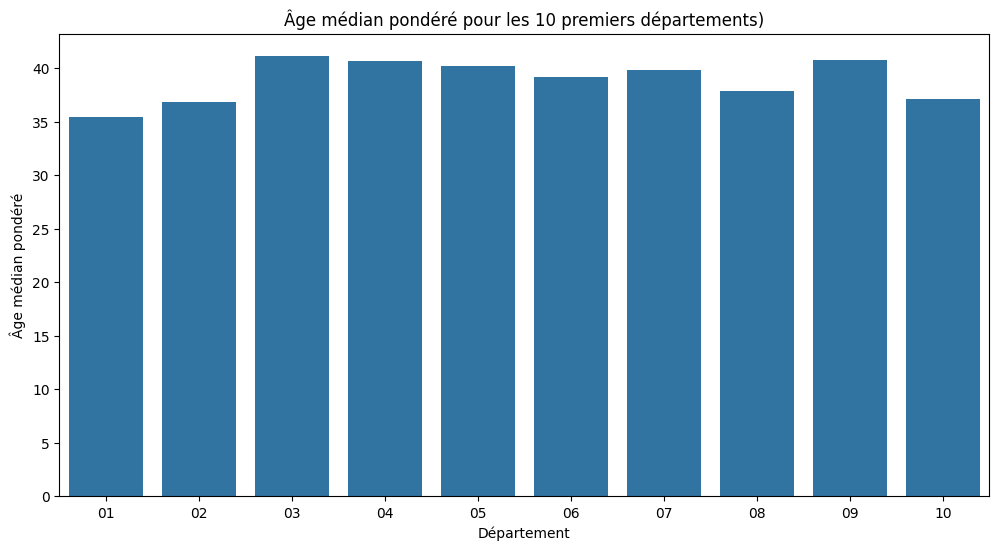

In [73]:
dep10 = age_median_dep.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='DEP', y='AGE_MEDIAN', data=dep10)
plt.xlabel("Département")
plt.ylabel("Âge médian pondéré")
plt.title("Âge médian pondéré pour les 10 premiers départements)")
